In [2]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder  
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('./profiles.csv')
df2=pd.read_csv('./SocialMediaUsersDataset.csv')
#essay0 - My self summary
#essay2 - I’m really good at
#essay4 - Favorite books, movies, show, music, and food


In [3]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:

columns_to_keep = ['job', 'ethnicity', 'education','speaks','pets', 'religion']


df_filtered = df[columns_to_keep]



In [5]:
df_filtered.head()

,job,ethnicity,education,speaks,pets,religion
0,transportation,"asian, white",working on college/university,english,likes dogs and likes cats,agnosticism and very serious about it
1,hospitality / travel,white,working on space camp,"english (fluently), spanish (poorly), french (...",likes dogs and likes cats,agnosticism but not too serious about it
2,NaN,NaN,graduated from masters program,"english, french, c++",has cats,NaN
3,student,white,working on college/university,"english, german (poorly)",likes cats,NaN
4,artistic / musical / writer,"asian, black, other",graduated from college/university,english,likes dogs and likes cats,NaN


In [6]:
df_filtered

,job,ethnicity,education,speaks,pets,religion
0,transportation,"asian, white",working on college/university,english,likes dogs and likes cats,agnosticism and very serious about it
1,hospitality / travel,white,working on space camp,"english (fluently), spanish (poorly), french (...",likes dogs and likes cats,agnosticism but not too serious about it
2,NaN,NaN,graduated from masters program,"english, french, c++",has cats,NaN
3,student,white,working on college/university,"english, german (poorly)",likes cats,NaN
4,artistic / musical / writer,"asian, black, other",graduated from college/university,english,likes dogs and likes cats,NaN
...,...,...,...,...,...,...
59941,sales / marketing / biz dev,NaN,graduated from college/university,english,has dogs,catholicism but not too serious about it
59942,entertainment / media,"white, other",working on college/university,english (fluently),likes dogs and likes cats,agnosticism
59943,construction / craftsmanship,asian,graduated from masters program,english (fluently),NaN,christianity but not too serious about it
59944,medicine / health,"asian, black",working on college/university,"english (fluently), spanish (poorly), chinese ...",likes dogs and likes cats,agnosticism but not too serious about it


In [7]:
df2

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela
...,...,...,...,...,...,...,...
99995,99996,Lionel Denault,Female,1983-07-31,'DIY and crafts',Dawan,China
99996,99997,Margie Mieszala,Female,1954-05-20,"'Cars and automobiles', 'Cooking', 'Outdoor ac...",Arcos de la Frontera,Spain
99997,99998,Joan Mercedes,Male,1975-06-06,"'Business and entrepreneurship', 'Cooking'",Los Andes,Chile
99998,99999,Marvin Massa,Female,1959-11-16,"'Gaming', 'Business and entrepreneurship', 'Fa...",Varjota,Brazil


In [8]:
df2=df2[:1000]
df_filtered=df_filtered[:1000]

In [9]:
df_filtered[['Name', 'Gender', 'City', 'Country']] = df2.loc[:, ['Name', 'Gender', 'City', 'Country']]



C:\Users\bhask\AppData\Local\Temp\ipykernel_32592\2757789612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Name', 'Gender', 'City', 'Country']] = df2.loc[:, ['Name', 'Gender', 'City', 'Country']]
C:\Users\bhask\AppData\Local\Temp\ipykernel_32592\2757789612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Name', 'Gender', 'City', 'Country']] = df2.loc[:, ['Name', 'Gender', 'City', 'Country']]
C:\Users\bhask\AppData\Local\Temp\ipykernel_32592\2757789612.py:1: SettingWithCo

In [14]:
df_filtered.columns

Index(['job', 'ethnicity', 'education', 'speaks', 'pets', 'religion', 'Name',
       'Gender', 'City', 'Country'],
      dtype='object')

In [11]:
len(df_filtered)

1000

In [92]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder



# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_filtered[['City', 'education', 'pets','Country','job','religion']]).toarray()

# Compute cosine similarity between users
similarity_matrix = cosine_similarity(encoded_data)

# Define a threshold for friendship (e.g., > 0.5 means they are friends)
threshold = 0.5

# Function to find friends based on cosine similarity
def find_friends_cosine(user_index, similarity_matrix, threshold=0.5):
    friends = []
    for i, similarity in enumerate(similarity_matrix[user_index]):
        if i != user_index and similarity > threshold:  # Exclude self-comparison
            friends.append(i)  # Add index of friends
    return friends

# Apply the function to each user and create a new 'Friends' column
df_filtered['Friends'] = [find_friends_cosine(i, similarity_matrix, threshold) for i in range(len(df_filtered))]


In [56]:
df_filtered_copy=df_filtered.copy()

In [89]:
df_filtered_copy.columns

Index(['Name', 'Gender', 'City', 'Country', 'job', 'ethnicity', 'education',
       'pets', 'religion', 'Friends'],
      dtype='object')

In [57]:
df_filtered=df_filtered[['Name', 'Gender', 'City', 'Country','job', 'ethnicity',  'education', 'pets', 'religion']]

In [58]:
df_filtered.columns

Index(['Name', 'Gender', 'City', 'Country', 'job', 'ethnicity', 'education',
       'pets', 'religion'],
      dtype='object')

In [59]:
df_filtered.religion.value_counts()

other                                         45
agnosticism but not too serious about it      43
agnosticism                                   43
atheism                                       42
agnosticism and laughing about it             35
christianity but not too serious about it     34
catholicism but not too serious about it      34
atheism and laughing about it                 33
christianity                                  30
catholicism                                   30
other and laughing about it                   29
other but not too serious about it            22
judaism but not too serious about it          19
atheism but not too serious about it          18
agnosticism and somewhat serious about it     17
christianity and somewhat serious about it    16
other and somewhat serious about it           16
atheism and somewhat serious about it         13
judaism and laughing about it                 13
christianity and very serious about it        12
other and very serio

In [60]:
df_filtered.ethnicity.value_counts()

white                                                                                                      572
asian                                                                                                       71
hispanic / latin                                                                                            55
hispanic / latin, white                                                                                     32
black                                                                                                       26
other                                                                                                       21
white, other                                                                                                15
indian                                                                                                      15
asian, white                                                                                                13
p

In [61]:
df_filtered.columns

Index(['Name', 'Gender', 'City', 'Country', 'job', 'ethnicity', 'education',
       'pets', 'religion'],
      dtype='object')

In [62]:
le = LabelEncoder()
df_encoded = df_filtered.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [63]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

df_encoded = df_filtered.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)



In [64]:
G = nx.Graph()

In [65]:
# Add nodes with user attributes
for idx, row in df_encoded.iterrows():
    G.add_node(idx, **row.to_dict())

In [66]:
similarity_matrix = cosine_similarity(df_encoded.values)

In [67]:
threshold = 0.7

In [68]:
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(i, j)


In [69]:
!pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable


In [70]:
pip install torch-geometric


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Index(['Name', 'Gender', 'City', 'Country', 'job', 'ethnicity', 'education',
       'pets', 'religion'],
      dtype='object')


In [99]:
pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [104]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from torch_geometric.utils import from_networkx
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Define GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x  # Return embeddings without softmax for cosine similarity

# Step 1: Encode categorical features and prepare graph data
categorical_columns = ['Name', 'Gender', 'City', 'Country', 'job', 'ethnicity', 'education', 'pets', 'religion']
df_encoded = df_filtered_copy.copy()

# Apply LabelEncoder to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Create a graph using NetworkX and add nodes with encoded attributes
G = nx.Graph()
for idx, row in df_encoded.iterrows():
    G.add_node(idx, **row.to_dict())

# Add edges based on cosine similarity (or any other relationship)
similarity_matrix = cosine_similarity(df_encoded.drop(columns=["Friends"]).values)
threshold = 0.7  # Define a similarity threshold for creating edges
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(i, j)

# Convert the NetworkX graph to a PyTorch Geometric graph
data = from_networkx(G)
data.x = torch.tensor(df_encoded.drop(columns=["Friends"]).values, dtype=torch.float)

# Step 2: Train GCN to learn node embeddings
input_dim = data.x.shape[1]
hidden_dim = 16  # Hidden layer size
output_dim = 16  # Output embeddings dimension (can be tuned)
model = GCN(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Forward pass and training
model.train()
for epoch in tqdm(range(100)):  # 100 epochs or as required
    optimizer.zero_grad()
    out = model(data)  # Get node embeddings
    loss = torch.mean(torch.norm(out, dim=1))  # Unsupervised training, minimizing embedding norms (you can choose another loss)
    loss.backward()
    optimizer.step()

# Step 3: Generate recommendations using learned embeddings
# Function to recommend top k friends based on cosine similarity of learned embeddings
def recommend_friends_gcn(user_id, embeddings, k=5):
    user_embedding = embeddings[user_id].reshape(1, -1)  # User's embedding from GCN
    similarities = cosine_similarity(user_embedding, embeddings)  # Compute cosine similarities
    similarities[0, user_id] = -1  # Exclude self from recommendations
    recommendations = similarities.argsort()[0][-k:]  # Top k similar users
    return recommendations

# Step 4: Calculate overall accuracy using GCN recommendations
def calculate_accuracy_gcn(user_id, recommendations, df_filtered_copy, total_users):
    user_friends = df_filtered_copy.loc[user_id, 'Friends']  # Get actual friends for the user
    all_users = set(range(total_users)) - {user_id}  # All users except the current user

    # True Positives (TP): Correct friend recommendations
    tp = len([rec for rec in recommendations if rec in user_friends])

    # False Positives (FP): Incorrect friend recommendations
    fp = len([rec for rec in recommendations if rec not in user_friends])

    # False Negatives (FN): Actual friends who were not recommended
    fn = len([friend for friend in user_friends if friend not in recommendations])

    # True Negatives (TN): Non-friends who were not recommended
    non_friends = all_users - set(user_friends)
    tn = len([user for user in non_friends if user not in recommendations])

   
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return accuracy

# Get GCN embeddings after training
model.eval()
with torch.no_grad():
    embeddings = model(data)

# Calculate total accuracy over all users
total_accuracy = 0
for user_id in tqdm(range(len(df_filtered_copy))):
    recommendations = recommend_friends_gcn(user_id, embeddings.numpy(), k=5)  # Get GCN-based recommendations
    accuracy = calculate_accuracy_gcn(user_id, recommendations, df_filtered_copy, len(df_filtered_copy))
    total_accuracy += accuracy

# Step 5: Print overall accuracy
overall_accuracy = total_accuracy / len(df_filtered_copy)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")


100%|██████████| 1000/1000 [00:12<00:00, 78.65it/s]

Overall Accuracy: 97.51%


In [77]:
df_filtered.iloc[400]

Name                         Mary Browne
Gender                            Female
City                             Jaigaon
Country                            India
job          sales / marketing / biz dev
ethnicity                          white
education                            NaN
pets                                 NaN
religion                             NaN
Name: 400, dtype: object

In [55]:
df_filtered.iloc[105]

Name                             John Watts
Gender                               Female
City                             Georgetown
Country                              Guyana
job                    education / academia
ethnicity                             white
education    graduated from masters program
pets                             likes dogs
religion                            judaism
Friends                     [150, 185, 555]
Name: 105, dtype: object

In [191]:
pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


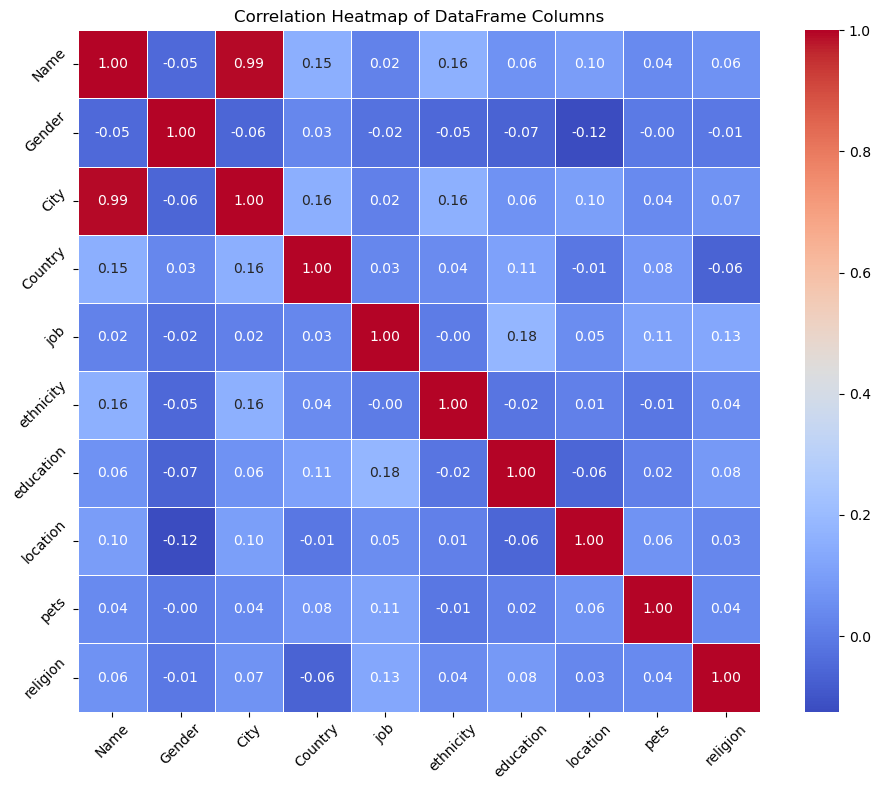

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert categorical variables to numerical codes
df_encoded = df_filtered.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)

# Step 2: Create a correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Plot the eatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/jathinsanjay/social_recommendation.git
git push -u origin main

SyntaxError: invalid syntax (3590803110.py, line 1)